# **STROJNO UČENJE** 22./23.
# Vježba 02 - rukovanje podacima i linearna regresija

Zadatak: predvidjeti cijenu dijamanata koristeći linearnu regresiju.

## Učitavanje podataka i osnovne značajke podataka

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/strojno_ucenje_2223/vj_02/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.tail(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
data.shape

(53940, 11)

In [ ]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

Pogledajte dokumentaciju za više informacija o korisnim svojstvima pandas biblioteke: [set_option](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.set_option.html).

In [ ]:
pd.set_option('display.max_columns', None)

Izbacujemo nepotrebne stupce/retke pomoću [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Pomoću [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html) provjeravamo postoje li nedefinirani/nedostajući NaN podaci. Koristimo metodu sum() kako bismo prebrojali nedostajuće podatke jer isna() vraća logičku masku. Postoje i drugi načini!

In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Nedostajuće podatke možemo brisati pomoću [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html). Iako ovdje nema nedostajućih podataka, možemo svejedno pogledati kako bismo to napravili:

In [ ]:
data.dropna(inplace=True, axis=0)

Slično činimo i da bismo provjerili postoje li duplicirani podaci.

In [ ]:
data.duplicated().sum()

146

In [ ]:
data.loc[data.duplicated()] # Boolean maska

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
data.shape

(53794, 10)

Duplikate možemo i brisati prema različitim kriterijima, odnosno duplikatima smatrati retke kojima su samo vrijednosti *odabranih* stupaca jednake. To bismo napravili na sljedeći način:

In [ ]:
# data.drop_duplicates(subset=['cut', 'clarity'], inplace=True)

Korisno je resetirati indekse redaka nakon uklanjanja. Zamislite scenarij: izbrisali smo 5 redaka iz tablice i onda želimo pristupiti podatku pod indeksom *i*. Taj podatak je sada neki drugi nego što je bio prije brisanja!

In [ ]:
data.reset_index(inplace=True, drop=True)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Pandas nudi [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) kao lak način za ispis karakteristične petorke (osnovnih deskriptivnih statističkih podataka).

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Vizualizacija podataka za eksplorativnu analizu

In [ ]:
categorical = data[['cut', 'color', 'clarity']]
numerical = data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]

Nacrtajmo histogram za kategoričke podatke i pogledajmo zašto nije dobra ideja miješati histogram i stupčasti dijagram (barplot).

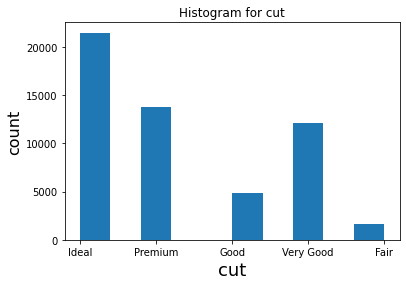

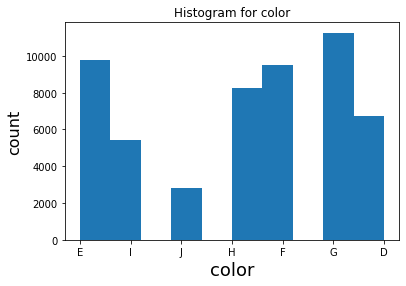

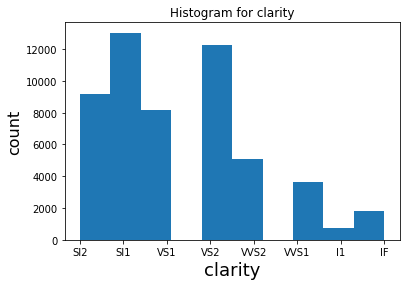

In [ ]:
import matplotlib.pyplot as plt

for col in categorical.columns:
    plt.hist(categorical[col])
    plt.title("Histogram for {0}".format(col))
    plt.xlabel(col, fontsize=18)
    plt.ylabel('count', fontsize=16)
    plt.show()

Iako se na histogramima čini da postoje "rupe" u prikazu distribucije, to nije stvarno tako nego je to rezultat podjele kategoričkih podataka u razrede. Histogram imitira stupčasti dijagram za kategoričke podatke (pa ga zato ipak možemo prisilno koristiti). Nije praksa da se histogram crta za nenumeričke podatke.

In [ ]:
categorical['cut'].value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [ ]:
categorical

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53789,Ideal,D,SI1
53790,Good,D,SI1
53791,Very Good,D,SI1
53792,Premium,H,SI2


In [ ]:
temp = categorical['cut'].value_counts().rename_axis('unique_values').reset_index(name='counts')
temp

,unique_values,counts
0,Ideal,21488
1,Premium,13748
2,Very Good,12069
3,Good,4891
4,Fair,1598


Pazimo da redoslijed kategorija za svaku kategoričku varijablu bude usklađen s pripadnim brojem redaka koji poprimaju tu vrijednost! Drugim riječima, pazimo da "visina" stupca u stupčastom dijagramu odgovara ispravnoj labeli jer [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) silazno sortira vrijednosti prema njihovom broju.

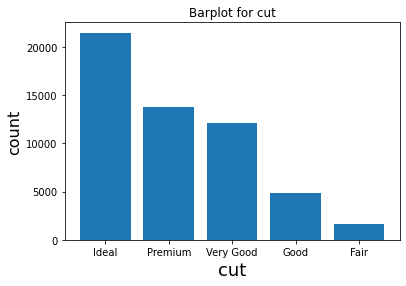

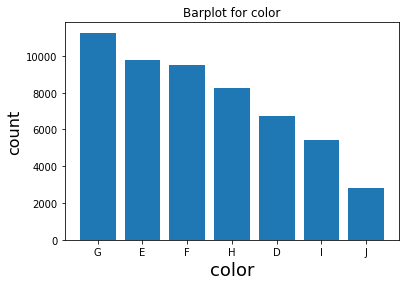

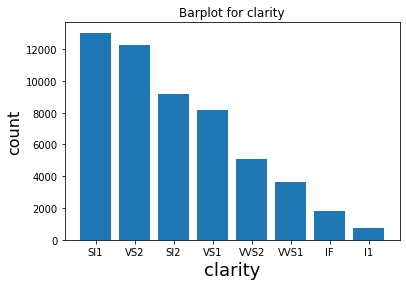

In [ ]:
for col in categorical.columns:
    temp = categorical[col].value_counts().rename_axis('unique_values').reset_index(name='counts')
    plt.bar(temp['unique_values'], temp['counts'])
    plt.title("Barplot for {0}".format(col))
    plt.xlabel(col, fontsize=18)
    plt.ylabel('count', fontsize=16)
    plt.show()

Nacrtajmo histogram i funkciju gustoće za numeričke podatke. [za one koje zanima više](https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

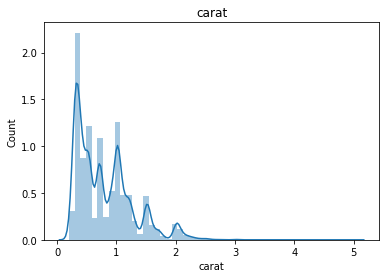

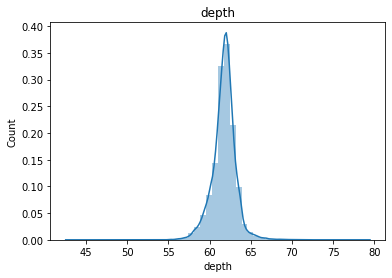

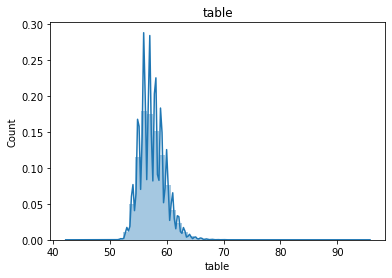

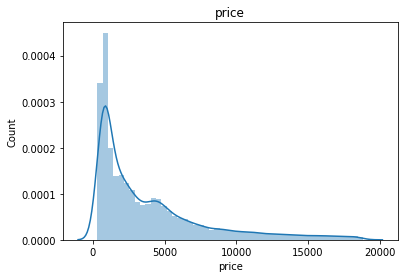

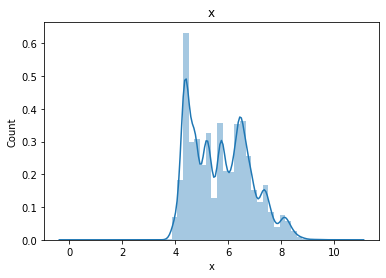

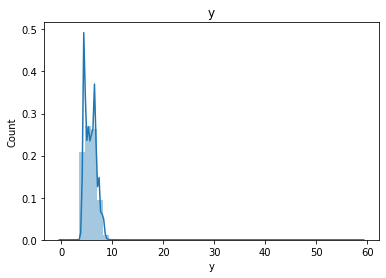

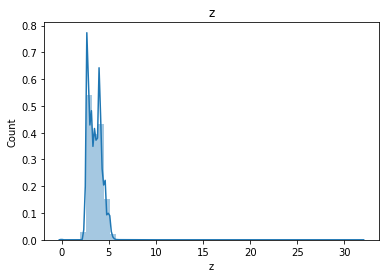

In [ ]:
import seaborn as sns

for col in numerical.columns:
  fig, ax = plt.subplots(1,1)
  sns.distplot(numerical[col])
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(col)
  fig.show()

Funkcija distplot() iz biblioteke Seaborn crta histogram uz funkciju gustoće.

- carat: pretpostavljamo da nije normalno distribuirana varijabla. Možemo potvrditi statističkim testom. Razdioba je nagnuta.
- depth: razdioba naliči normalnoj ili studentovoj. simetrična, unimodalna.
- table: slično kao carat
- price: udesno nagnuta razdioba, ima smisla da ovako izgleda. Čini se da najviše ima najjeftinijih dijamanata, a što cijena raste, primjeraka te cijene je manje
- x, y, z: pretpostavljamo da se radi o dimenzijama dijamanata. Najviše je manjih dijamanata (što je i logično).

Koristimo [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) kako bismo dobili matricu korelacija među varijablama. Parametar method se odnosi na vrstu koeficijenta korelacije koji se koristi pri izračunu. Moguće je odabrati između 'pearson', 'spearman' ili 'kendall'. Svaki od koeficijenata je pogodan u različitim slučajevima:
- [pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) - provjerava jačinu [linearne](https://en.wikipedia.org/wiki/Linearity) veze među varijablama
- [spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) - provjerava jačinu [monotone](https://en.wikipedia.org/wiki/Monotonic_function) veze među varijablama
- [kendall](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) - koristimo kad postoji [uređajna](https://en.wikipedia.org/wiki/Rank_correlation#General_correlation_coefficient) veza među varijablama

In [ ]:
corr = numerical.corr(method="pearson")
print(corr)

          carat     depth     table     price         x         y         z
carat  1.000000  0.027861  0.181091  0.921548  0.975380  0.951908  0.953542
depth  0.027861  1.000000 -0.297669 -0.011048 -0.025348 -0.029389  0.094757
table  0.181091 -0.297669  1.000000  0.126566  0.194855  0.183231  0.150270
price  0.921548 -0.011048  0.126566  1.000000  0.884504  0.865395  0.861208
x      0.975380 -0.025348  0.194855  0.884504  1.000000  0.974592  0.970686
y      0.951908 -0.029389  0.183231  0.865395  0.974592  1.000000  0.951844
z      0.953542  0.094757  0.150270  0.861208  0.970686  0.951844  1.000000


Ono što nas najviše zanima je odnos ostalih varijabli prema cijeni, i međusobni odnos parametara koje ćemo koristiti u predviđanju cijene.

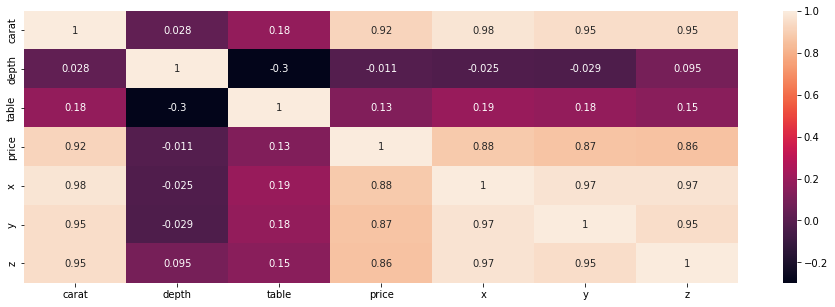

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)

Varijable 'depth' i 'table' imaju najmanju korelaciju sa svim ostalim varijablama. Prvi poriv je izbaciti te parametre iz analize. No, niski koeficijent korelacije ne znači da te značajke neće doprinijeti kvaliteti modela.

Inače se najviše problema stvara kod varijabli koje su visoko korelirane ili čak kolinearne. Nasuprot naivnoj pretpostavci, visoka međusobna koreliranost značajki za predviđanje ne poboljšava moć modela da predvidi nezavisnu varijablu. Čak i ako se izbace neke od međusobno koreliranih značajki, i dalje postoji opasnost od pojave da tada prijašnje nisko korelirane značajke postanu visoko korelirane.

Izbor varijabli za regresijsko predviđanje je kompliciran posao i često se razlikuje od jednog skupa podataka do drugog (zbog razdiobe podataka ili nekih drugih utjecaja).

Ovdje se nije biralo značajke nego se uzelo sve. To ne garantira najbolju moć modela, iako je intuitivno da više značajki (a time i više informacija) mora rezultirati boljim predviđanjem. Postoje metode za izbor značajki (npr. na temelju korelacije, dobitka informacija - "information gain", itd.).

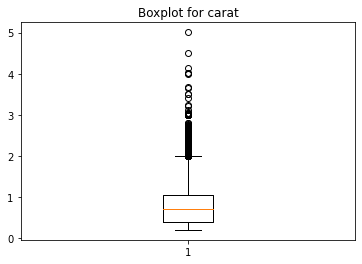

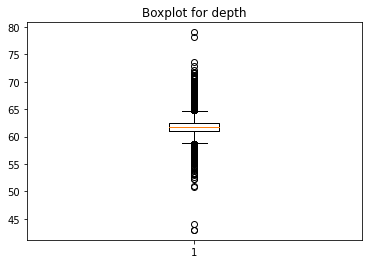

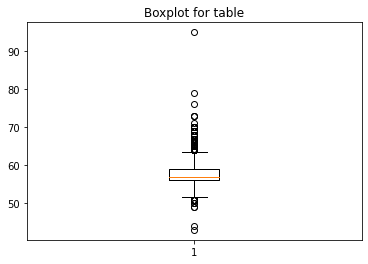

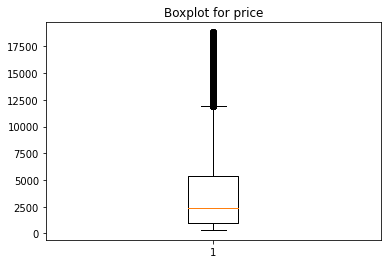

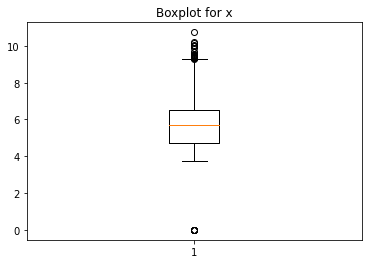

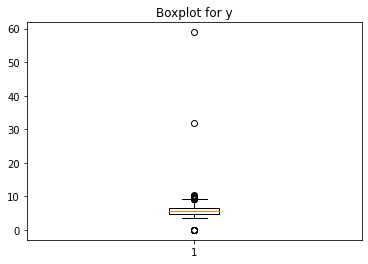

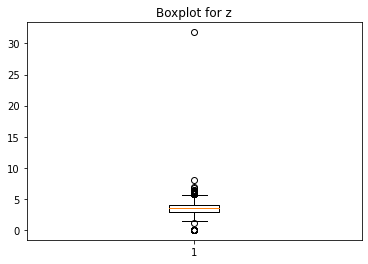

In [ ]:
for col in numerical.columns:
    plt.title("Boxplot for {0}".format(col))
    plt.boxplot(numerical[col])
    plt.show()

Na kutijastim dijagramima vidimo obilje outliera (ekstremnih vrijednosti), što i ne čudi previše jer zbirka dijamanata ovog uzorka sadrži razno razne vrste dijamanata a u skladu s tim postoji i velika varijacija u cijeni.

Iako je prva ideja što pada na pamet izbaciti sve outliere, to vjerojatno nije dobra ideja za ovaj skup podataka jer outlieri sačinjavanju veliki dio podataka.

**Iako se uvriježilo mišljenje da outliere treba uvijek izbaciti, [to nije točno](https://stats.stackexchange.com/questions/463597/when-to-remove-outliers)! Izbacivanje outliera ovisi o onome što želimo postići - u strojnom učenju želimo poboljšati moć modela kojeg izgrađujemo i u tom slučaju izbacivanje outliera nekad daje pozitivan učinak, a nekad negativan. Svaki use-case je priča za sebe.**

Također, postoje situacije u kojima izbacivanje outliera nema smisla - razmislite što ako model koristimo u medicini za predviđanje bolesti. Rijetke bolesti su outlieri, ali i dalje ih želimo uključiti inače imamo model koji nema nikakvu informaciju o tim, možda najbitnijim, bolestima.

## Linearna regresija
- train test split
- normalizacija/standardizacija
- algoritam: linearna regresija
- evaluacija

### Jednostavniji primjer

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


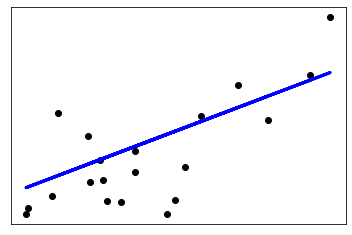

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

[Linearna regresija](https://en.wikipedia.org/wiki/Linear_regression) je model kojim se od nezavisnih varijabli $x_1, \ldots, x_n$ modelira zavisna varijabla $y$ *linearno*, odnosno gdje se zavisna varijabla $y$ pokušava prikazati kao linearna kombinacija nezavisnih varijabli uz dodatak slobodnog člana $b$: $$y = a_1 \cdot x_1 + \ldots + a_n \cdots x_n + b + \epsilon,$$
odnosno $y$ se želi prikazati kao izlaz linearne funkcije od varijabli $x_1, \ldots, x_n$.

Naravno, pošto se radi o aproksimaciji, $y$ neće biti linearna kombinacija $x_1,\ldots,x_n$ pa se zato dodaje slobodni član $\epsilon$ koji se još naziva i *greškom*.

U jednostavnoj linearnoj regresiji imamo samo 1 nezavisnu i samo 1 zavisnu varijablu pa gornja jednadžba postaje jednadžba pravca $$y = ax + b.$$

U općenitom slučaju je više zavisnih varijabli kao u prethodnoj jednadžbi. Uobičajeno se koristi matrična notacija: $$y = XA + \epsilon,$$ gdje je $y$ zavisna varijabla kao i prije, $X=(1, x_1, \ldots, x_n)$ matrica zavisnih varijabli, i $A=\begin{bmatrix}
b \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}$ matrica koeficijenata.

Treniranje modela linearne regresije se svodi na problem optimizacije - smanjiti grešku aproksimacije $$\epsilon = y - XA.$$



Postoji i općeniti oblik linearne regresije (eng. [general linear model](https://en.wikipedia.org/wiki/General_linear_model)) gdje je moguće imati i više zavisnih varijabli. Taj model se može shvatiti kao nekoliko jednostavnih modela povezanih u jedan.

### Kompliciraniji primjer

#### Procesiranje podataka

Ideja: predviđanje parametra "price" pomoću parametara "carat",  "cut",  "color",  "clarity",  "depth",  "table", "x", "y", "z".

Prvi korak: podjela podataka na skup za treniranje i skup za testiranje. Ugrađena sklearn funkcija u pozadini ima logiku nasumičnosti, tj. neće jednostavno pocijepati skup na dva dijela, nego ga i permutira.

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X = train_test_split(data)
train_y = train_X['price']
test_y = test_X['price']

train_X.drop(['price'], axis=1, inplace=True)
test_X.drop(['price'], axis=1, inplace=True)

train_X.shape, test_X.shape

((40345, 9), (13449, 9))

Ispuštamo parametre koje nećemo koristiti za predviđanje cijene, uključujući ispuštanje same cijene iz podataka koji će sačinjavati matricu značajki (eng. feature matrix).

Već smo uklonili ranije sve stupce koji ne sadrže korisne informacije (poput suvišnog indeksa).

Koristit ćemo sve dostupne varijable za predviđanje. Dakle provodimo multilinearnu regresiju: $$y = a_1 \cdot x_1 + \ldots + a_n \cdot x_n + b,$$ odnosno $$price = a_1 \cdot carat + a_2 \cdot cut + a_3 \cdot color + a_4 \cdot clarity + a_5 \cdot depth + a_6 \cdot table + a_7 \cdot x + a_8 \cdot y + a_9 \cdot z + b .$$

Da bismo mogli koristiti kategoričke varijable u algoritmu, moramo ih kodirati u numeričke vrijednosti.

Kako su kategoričke varijable ordinalne (postoji uređaj na skupu vrijednosti svake kategoričke varijable), koristi se rastući niz prirodnih brojeva.

Postoji sklearn ugrađena funkcija za pretvorbu kategoričkih varijabli u numerički "ekvivalent" i drugi načini da se kategoričke varijable pretvore u numeričke.

In [ ]:
cut = lambda x : 1 if x=='Fair' else ( 2 if x=='Good' else ( 3 if x=='Very Good' else ( 4 if x=='Premium' else (5))))
train_X['cut'] = train_X['cut'].apply(cut)
test_X['cut'] = test_X['cut'].apply(cut)

color = lambda x : 1 if x=='D' else ( 2 if x=='E' else ( 3 if x=='F' else ( 4 if x=='G' else ( 5 if x=='H' else ( 6 if x=='I' else (7))))))
train_X['color'] = train_X['color'].apply(color)
test_X['color'] = test_X['color'].apply(color)

clarity = lambda x : 1 if x=='I1' else ( 2 if x=='SI2' else ( 3 if x=='SI1' else ( 4 if x=='VS2' else ( 5 if x=='VS1' else ( 6 if x=='VVS2' else ( 7 if x=='VVS1' else (8)))))))
train_X['clarity'] = train_X['clarity'].apply(clarity)
test_X['clarity'] = test_X['clarity'].apply(clarity)

train_X, test_X

(       carat  cut  color  clarity  depth  table     x     y     z
 41119   0.56    4      4        2   60.0   60.0  5.48  5.42  3.11
 29410   0.40    3      4        3   62.8   60.0  4.66  4.70  2.94
 2566    0.82    4      2        3   61.2   61.0  5.98  5.95  3.65
 16012   0.30    4      5        4   62.5   58.0  4.28  4.26  2.67
 7428    0.90    4      3        3   59.9   59.0  6.26  6.29  3.76
 ...      ...  ...    ...      ...    ...    ...   ...   ...   ...
 8565    1.19    4      6        2   61.6   56.0  6.87  6.83  4.22
 37281   0.50    5      6        3   62.0   55.0  5.08  5.11  3.16
 6963    1.18    5      2        1   61.6   56.0  6.79  6.82  4.19
 42039   0.53    3      6        5   61.6   56.7  5.18  5.21  3.20
 14559   1.09    4      4        4   59.9   56.0  6.73  6.59  3.99
 
 [40345 rows x 9 columns],
        carat  cut  color  clarity  depth  table     x     y     z
 9424    0.90    5      3        2   61.9   57.0  6.13  6.18  3.81
 49974   0.50    5      3        

Pretvaramo Pandas dataframe objekte u Numpy array objekte zbog kasnije korištenih sklearn algoritama koji očekuju ulaz tog tipa.

In [ ]:
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()
train_X

array([[0.56, 4.  , 4.  , ..., 5.48, 5.42, 3.11],
       [0.4 , 3.  , 4.  , ..., 4.66, 4.7 , 2.94],
       [0.82, 4.  , 2.  , ..., 5.98, 5.95, 3.65],
       ...,
       [1.18, 5.  , 2.  , ..., 6.79, 6.82, 4.19],
       [0.53, 3.  , 6.  , ..., 5.18, 5.21, 3.2 ],
       [1.09, 4.  , 4.  , ..., 6.73, 6.59, 3.99]])

Prije samog pokušaja predviđanja, potrebno je standardizirati podatke. Trenutno nisu balansirani, a algoritmi koji se koriste u regresiji obično rade bolje (jer očekuju) podatke koji su standardizirani: "Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance." ~ sklearn [dokumentacija](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler).

Standardizacijom se podaci $x$ centriraju i skaliraju na [sljedeći način](https://en.wikipedia.org/wiki/Standard_score): $$x = \frac{x - \mu}{\sigma}$$ gdje su $\mu$, $\sigma$ aritmetička sredina (eng. mean) i standardna devijacija, redom.

P.S. Ako i vi želite pisati lijepe formule u svom projektu, pogledajte [kako](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_X

array([[-0.50449239,  0.08931383,  0.23728236, ..., -0.22732275,
        -0.27696957, -0.61903423],
       [-0.84124947, -0.80371377,  0.23728236, ..., -0.95744531,
        -0.90155844, -0.86333089],
       [ 0.04273787,  0.08931383, -0.93568302, ...,  0.21787393,
         0.18279724,  0.15696692],
       ...,
       [ 0.8004413 ,  0.98234143, -0.93568302, ...,  0.93909255,
         0.93750878,  0.93296807],
       [-0.56763434, -0.80371377,  1.41024775, ..., -0.49444076,
        -0.45914132, -0.4897007 ],
       [ 0.61101545,  0.08931383,  0.23728236, ...,  0.88566895,
         0.73798734,  0.64556024]])

Primijetimo da koristimo **iste** parametre ($\mu, \sigma$) i za podatke za treniranje i za podatke za testiranje. Time sprječavamo pojavu tzv. [curenja podataka](https://machinelearningmastery.com/data-leakage-machine-learning/).

#### Linearna regresija

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

In [ ]:
# treniranje
regr.fit(train_X, train_y)

LinearRegression()

In [ ]:
y_pred = regr.predict(test_X) # predviđanje
y_pred

array([3986.22914659, 2609.22297291, 4153.98134688, ..., 3137.26147686,
       6066.90552533, 1517.44598862])

In [ ]:
regr.score(test_X, test_y)

0.9086945845693106

In [ ]:
print("Koeficijenti: \n", regr.coef_)
print()
print("MSE - srednja kvadratna greška (eng. mean squared error): %.2f" % mean_squared_error(test_y, y_pred))
print()
print("Koeficijent determinacije: %.2f" % r2_score(test_y, y_pred))

Koeficijenti: 
 [5051.79218999  134.98637161 -550.50231211  829.4924161  -113.22540574
  -67.29095083 -854.8741006    42.53916014  -92.52542601]

MSE - srednja kvadratna greška (eng. mean squared error): 1438801.82

Koeficijent determinacije: 0.91


[Srednja kvadratna greška](https://en.wikipedia.org/wiki/Mean_squared_error) računa se sa: $$MSE(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2$$ gdje je
- $y$ prava vrijednost,
- $\hat{y}$ predviđena vrijednost (ono što je izlaz modela),
- $N$ broj podataka.
MSE nije ograničena odozgo (ovisi o vrijednostima $y, \hat{y}$), ali ima minimalnu vrijednost koju može postići - 0. Ako je $MSE = 0$, to znači da je greška jednaka 0, odnosno model je savršen.

[Koeficijent determinacije](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ je statistika koja predstavlja proporciju varijacije zavisne varijable koja je objašnjiva pomoću nezavisnih varijabli. $$R^2 = 1 - \frac{ \sum_{i=1}^{N}(y_i-\hat{y}_i)^2 }{ \sum_{i=1}^{N}(y_i-\bar{y})^2 }$$ gdje je $\bar{y}$ aritmetička sredina $\bar{y} = \frac{1}{N}\sum_{i=1}^{N}y_i$.

U idealnom slučaju imamo $R^2=1$ jer su razlike $y_i-\hat{y}_i = 0$.